In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5.0 * np.exp(-x / 2.0)

def h(x):
    return f(x).astype(int)

In [3]:
def plot(x, f=f):
    plt.plot(x, f(x))

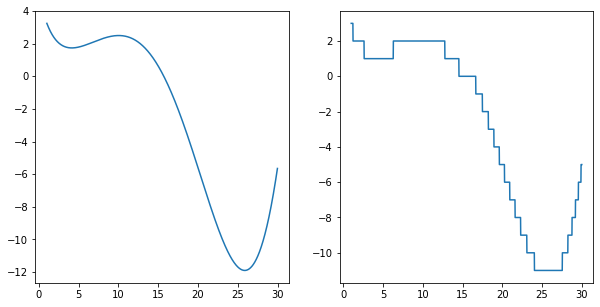

In [4]:
x = np.arange(1, 30, 0.01)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(x)
plt.subplot(1,2,2)
plot(x, h)

# Minimizing smooth functions

In [5]:
scipy.optimize.minimize(f, 26)

      fun: -11.898894665979789
 hess_inv: array([[1.67276794]])
      jac: array([1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([25.8801953])

In [6]:
bfgs2 = scipy.optimize.minimize(f, 2, method='bfgs')
bfgs2

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

In [7]:
bfgs30 = scipy.optimize.minimize(f, 30, method='bfgs')
bfgs30

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])

In [8]:
answer1 = ' '.join([str(np.round(bfgs2.fun, 2)), str(np.round(bfgs30.fun, 2))])

with open('answer-1.txt', 'w') as file:
    file.write(answer1)

# Global minimum

In [9]:
de = scipy.optimize.differential_evolution(f, [(1, 30)])
de

     fun: array([-11.89889467])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019292])

In [10]:
with open('answer-2.txt', 'w') as file:
    file.write(str(np.round(de.fun, 2)[0]))

# Minimizing nonsmooth functions

In [11]:
bfgs = scipy.optimize.minimize(h, 30, method='bfgs')
bfgs

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [12]:
nde = scipy.optimize.differential_evolution(h, [(1, 30)])
nde

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 137
     nit: 8
 success: True
       x: array([24.76862055])

In [13]:
answer3 = ' '.join([str(bfgs.fun[0]), str(nde.fun)])

with open('answer-3.txt', 'w') as file:
    file.write(answer3)